In [2]:
from math import sqrt
from PIL import Image, ImageDraw

In [3]:
def length(a):
  # タプルで初期値設定
  x, y = 0,0
  for (dx, dy) in a:
    x += dx
    y += dy
  return sqrt(x**2+y**2)

In [4]:
def convert(a,b):
  ax, ay = a
  alen = sqrt(ax**2+ay**2)
  c = ax/alen
  s = ay/alen
  scale = alen/length(b)
  b = [(scale*x, scale*y) for (x,y) in b]
  # bをaと同じスケールにする
  b = [(c * x - s*y, s * x + c *y) for (x,y) in b]
  # (x,y)をaの傾き分傾ける
  return b

In [5]:
def apply(a,b):
  r = []
  for i in a:
  # aはタプルのリスト、各タプルに対してconvertを適用し、rにまとめる
   r += convert(i,b)
  return r

In [6]:
def draw_line(draw, a, size):
  x1, y1 = 0,0
  for (dx, dy) in a:
    x2 = x1 + dx
    y2 = y1 + dy
    draw.line((x1, size/2 - y1, x2, size/2 - y2), fill=(255,255,255))
    # 描画ではグラフは左上スタート
    x1, y1 = x2, y2
    # 次の始点を移動

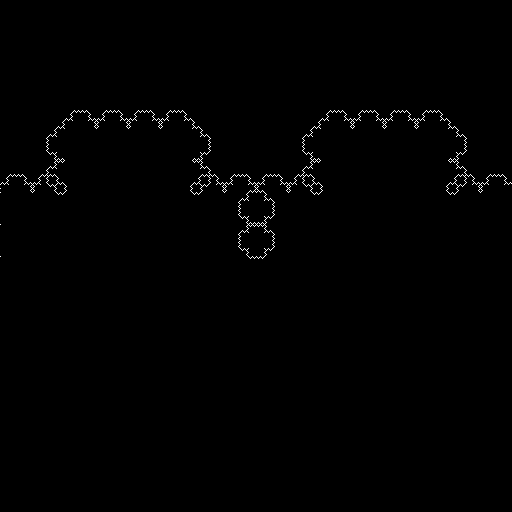

In [19]:
size = 512
N =5
img = Image.new("RGB", (size,size))
draw = ImageDraw.Draw(img)
a = [(size, 0)]
# b = [(1,0) ,(0.5, sqrt(3.0) /2),(0.5, -sqrt(3.0)/2), (1,0)]
b = [(1,1),(1,-1), (1,1),(1,-1)]
for _ in range(N):
  a = apply(a,b)
draw_line(draw, a ,size)
img

In [10]:
def draw_line_color(draw, a, colors, size):
  x1, y1 = 0, 0
  for i, (dx, dy) in enumerate(a):
    x2 = x1 + dx
    y2 = y1 + dy
    c = colors[i % len(colors)]
    # colors[0]→colors[i % len(colors)]に
    # 今回、len(colors)==3なので3でも可能
    draw.line((x1, size /2 -y1,x2, size/2 - y2), fill = c)
    x1, y1 = x2, y2

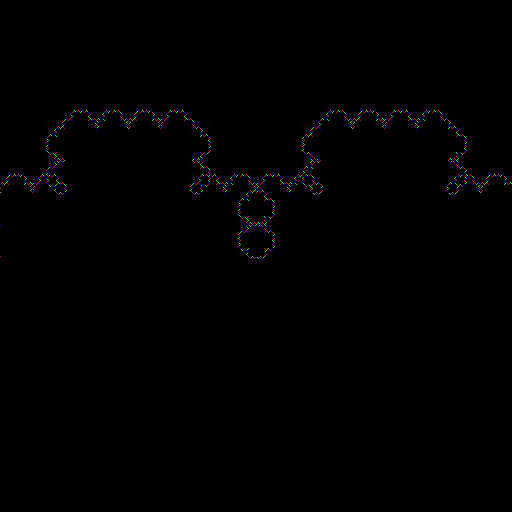

In [21]:
size = 512
N = 5
img = Image.new("RGB", (size, size))
draw = ImageDraw.Draw(img)
a = [(size, 0)]
# b = [(1,0), (0.5,sqrt(3.0)/2), (0.5,-sqrt(3.0)/2), (1,0)]
b = [(1,1),(1,-1), (1,1),(1,-1)]
c = [(255,0,0),(0,255,0), (0,0,255)]
for _ in range(N):
  a = apply(a,b)
draw_line_color(draw, a, c, size)
img